**Name: Abeer Fatima**

**Student ID: CA/MA1/4373**

**Internship Position: Data Analytics Intern**

**Company: CodeAlpha**

---

\



#**TASK #04**
####**Perform Sentiment Analysis to determine whether text is positive, negative, or neutral**

# **Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/daraz-product-reviews.csv")

In [ ]:
df.head()

,Sentiments,Reviews
0,negative,Stuff and design was totally changed. cheap qu...
1,positive,"i got my parxel before time,sorry for late rev..."
2,positive,So far so good..... Bought it only because it ...
3,neutral,Received as described but not suitable such ha...
4,positive,Received on time and in a safely packed box. T...


In [ ]:
df.shape

(16990, 2)

In [ ]:
df.isnull().sum()

,0
Sentiments,0
Reviews,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiments  16990 non-null  object
 1   Reviews     16990 non-null  object
dtypes: object(2)
memory usage: 265.6+ KB
None


In [ ]:
print(df.describe())

       Sentiments                                            Reviews
count       16990                                              16990
unique          3                                              16990
top      positive  Stuff and design was totally changed. cheap qu...
freq        10167                                                  1


# **nltk**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource
from nltk.tokenize import word_tokenize

df['tokenized_reviews'] = df['Reviews'].astype(str).apply(word_tokenize)
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


  Sentiments                                            Reviews  \
0   negative  Stuff and design was totally changed. cheap qu...   
1   positive  i got my parxel before time,sorry for late rev...   
2   positive  So far so good..... Bought it only because it ...   
3    neutral  Received as described but not suitable such ha...   
4   positive  Received on time and in a safely packed box. T...   

                                   tokenized_reviews  
0  [Stuff, and, design, was, totally, changed, .,...  
1  [i, got, my, parxel, before, time, ,, sorry, f...  
2  [So, far, so, good, ....., Bought, it, only, b...  
3  [Received, as, described, but, not, suitable, ...  
4  [Received, on, time, and, in, a, safely, packe...  


# **Show token**

In [ ]:
print(df['tokenized_reviews'][0])


['Stuff', 'and', 'design', 'was', 'totally', 'changed', '.', 'cheap', 'quality', '😐', 'not', 'satisfied']


In [ ]:
import nltk

# Download the necessary resource
nltk.download('averaged_perceptron_tagger_eng')

# Apply pos_tag to the tokenized reviews
df['pos_tags'] = df['tokenized_reviews'].apply(nltk.pos_tag)
print(df.head())

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


  Sentiments                                            Reviews  \
0   negative  Stuff and design was totally changed. cheap qu...   
1   positive  i got my parxel before time,sorry for late rev...   
2   positive  So far so good..... Bought it only because it ...   
3    neutral  Received as described but not suitable such ha...   
4   positive  Received on time and in a safely packed box. T...   

                                   tokenized_reviews  \
0  [Stuff, and, design, was, totally, changed, .,...   
1  [i, got, my, parxel, before, time, ,, sorry, f...   
2  [So, far, so, good, ....., Bought, it, only, b...   
3  [Received, as, described, but, not, suitable, ...   
4  [Received, on, time, and, in, a, safely, packe...   

                                            pos_tags  
0  [(Stuff, NNP), (and, CC), (design, NN), (was, ...  
1  [(i, NN), (got, VBD), (my, PRP$), (parxel, NN)...  
2  [(So, RB), (far, RB), (so, RB), (good, JJ), (....  
3  [(Received, VBN), (as, IN), (describe

# **Apply chunk**

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Apply pos_tag to the tokenized reviews in chunks
chunk_size = 100
for i in range(0, len(df), chunk_size):
    chunk = df['Reviews'][i:i + chunk_size].astype(str)
    df['tokenized_reviews'][i:i + chunk_size] = chunk.apply(word_tokenize)
    df['pos_tags'][i:i + chunk_size] = df['tokenized_reviews'][i:i + chunk_size].apply(nltk.pos_tag)

print(df.head())

<ipython-input-11-df95738d0921>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['tokenized_reviews'][i:i + chunk_size] = chunk.apply(word_tokenize)
<ipython-input-11-df95738d0921>:14: FutureWarning: ChainedAssignmentError: behaviour wil

  Sentiments                                            Reviews  \
0   negative  Stuff and design was totally changed. cheap qu...   
1   positive  i got my parxel before time,sorry for late rev...   
2   positive  So far so good..... Bought it only because it ...   
3    neutral  Received as described but not suitable such ha...   
4   positive  Received on time and in a safely packed box. T...   

                                   tokenized_reviews  \
0  [Stuff, and, design, was, totally, changed, .,...   
1  [i, got, my, parxel, before, time, ,, sorry, f...   
2  [So, far, so, good, ....., Bought, it, only, b...   
3  [Received, as, described, but, not, suitable, ...   
4  [Received, on, time, and, in, a, safely, packe...   

                                            pos_tags  
0  [(Stuff, NNP), (and, CC), (design, NN), (was, ...  
1  [(i, NN), (got, VBD), (my, PRP$), (parxel, NN)...  
2  [(So, RB), (far, RB), (so, RB), (good, JJ), (....  
3  [(Received, VBN), (as, IN), (describe

# **Download the VADER lexicon**

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia

In [ ]:
sia.polarity_scores("this is good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [ ]:
sia.polarity_scores("this is bad")

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [ ]:
sia.polarity_scores("example")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

# **Apply polarity scores**

In [ ]:
from tqdm.notebook import tqdm

# Apply polarity_scores to the 'Reviews' column
results = []
for sentence in tqdm(df['Reviews']):
    try:
      scores = sia.polarity_scores(str(sentence)) # Convert to string to handle potential errors
      results.append(scores)
    except Exception as e:
      print(f"Error processing sentence: {sentence}. Error: {e}")
      results.append({'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0})


# Create a new DataFrame from the polarity scores
results_df = pd.DataFrame(results)
df = pd.concat([df, results_df], axis=1)
print(df.head())

  0%|          | 0/16990 [00:00<?, ?it/s]

  Sentiments                                            Reviews  \
0   negative  Stuff and design was totally changed. cheap qu...   
1   positive  i got my parxel before time,sorry for late rev...   
2   positive  So far so good..... Bought it only because it ...   
3    neutral  Received as described but not suitable such ha...   
4   positive  Received on time and in a safely packed box. T...   

                                   tokenized_reviews  \
0  [Stuff, and, design, was, totally, changed, .,...   
1  [i, got, my, parxel, before, time, ,, sorry, f...   
2  [So, far, so, good, ....., Bought, it, only, b...   
3  [Received, as, described, but, not, suitable, ...   
4  [Received, on, time, and, in, a, safely, packe...   

                                            pos_tags    neg    neu    pos  \
0  [(Stuff, NNP), (and, CC), (design, NN), (was, ...  0.206  0.794  0.000   
1  [(i, NN), (got, VBD), (my, PRP$), (parxel, NN)...  0.000  0.729  0.271   
2  [(So, RB), (far, RB), (so,

# **Compound reviews**

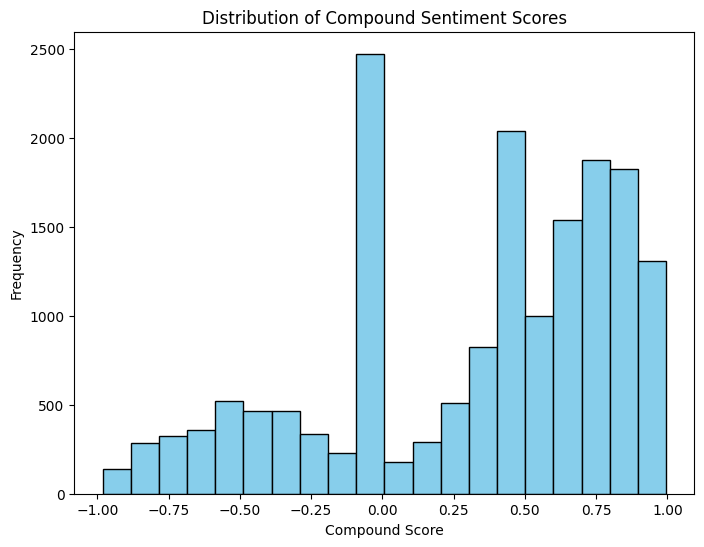

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['compound'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

# **Compound Score by Review**

<ipython-input-19-23afeb70bbda>:15: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
<ipython-input-19-23afeb70bbda>:15: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
<ipython-input-19-23afeb70bbda>:15: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
<ipython-input-19-23afeb70bbda>:15: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
<ipython-input-19-23afeb70bbda>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels fro

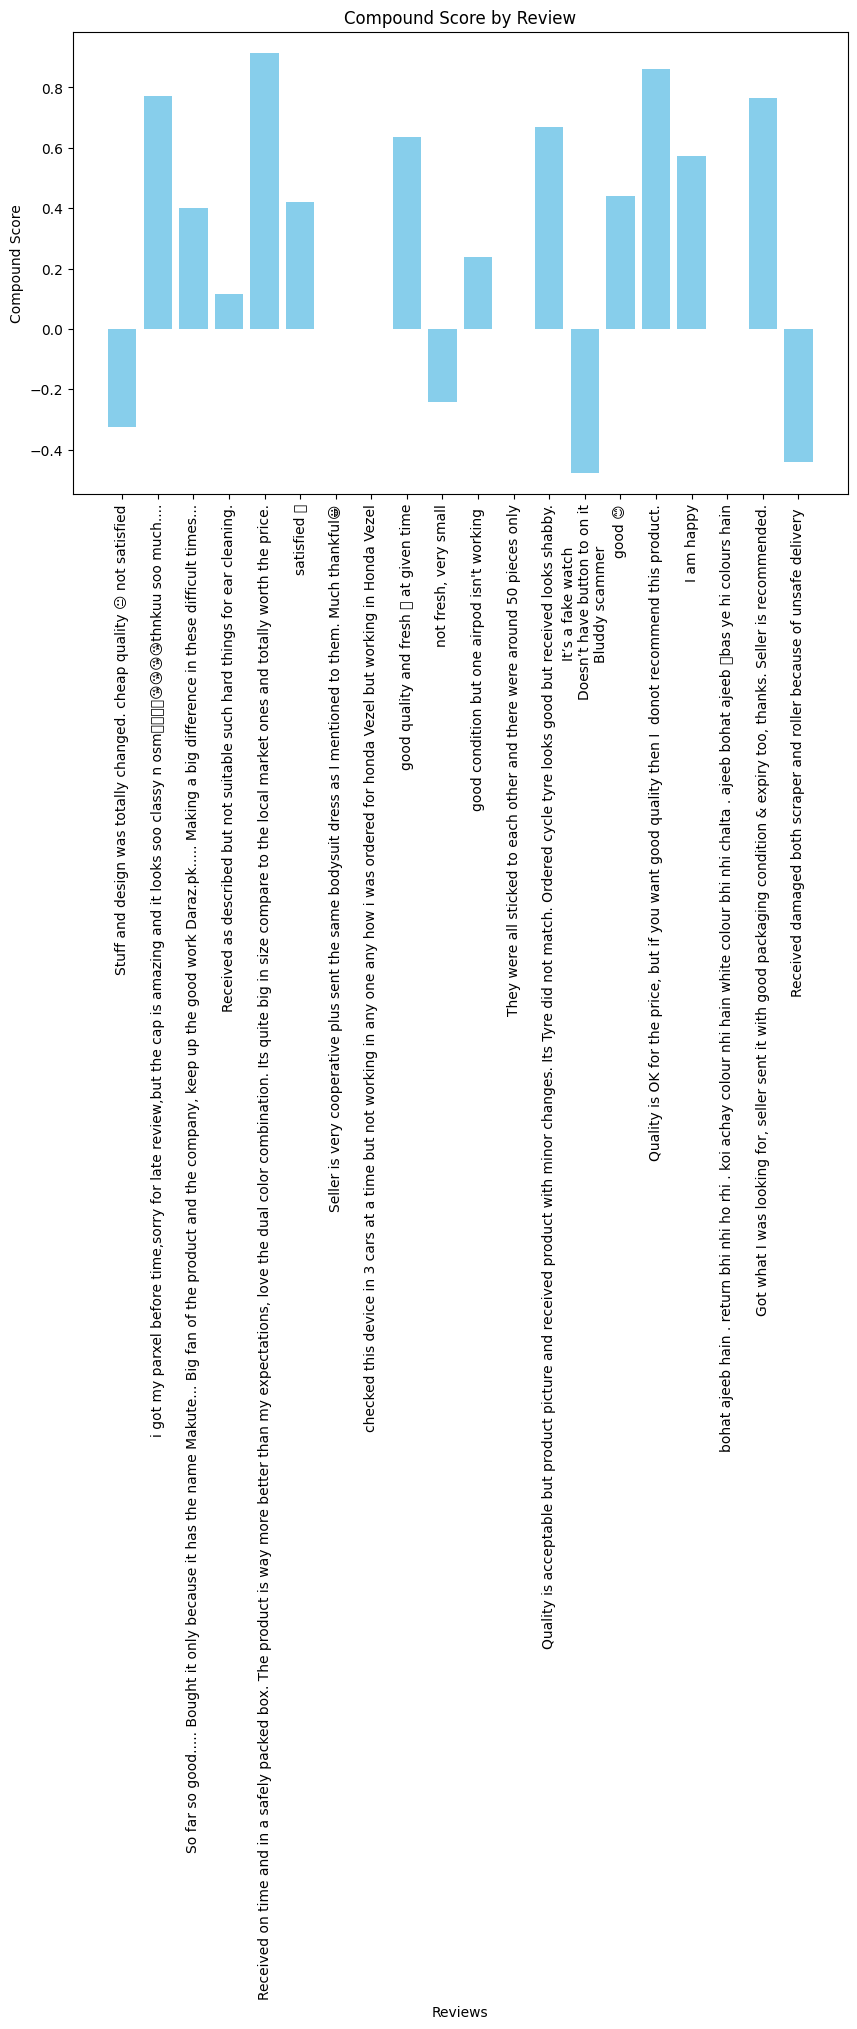

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Reviews'].astype(str)[:20], df['compound'][:20], color='skyblue')  # Limit to first 20 reviews for visualization
plt.xlabel('Reviews')
plt.ylabel('Compound Score')
plt.title('Compound Score by Review')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Transformer**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

# **Roberta Model**

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.2431799, 'roberta_neu': 0.6866873, 'roberta_pos': 0.07013281}


# **Polarity scores using the Roberta model**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

def polarity_scores_roberta(text):
    """
    Calculates polarity scores using the Roberta model.

    Args:
        text (str): The input text.

    Returns:
        dict: A dictionary containing the polarity scores
              with keys 'roberta_neg', 'roberta_neu', 'roberta_pos'.
    """
    encoded_text = tokenizer(text, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reviews']
        vader_result = sia.polarity_scores(text)
        roberta_result = polarity_scores_roberta(text)  # Call the defined function
        both_result = {**vader_result, **roberta_result}
        res[i] = both_result
    except RuntimeError:
        print(f'Broke for index {i}')

  0%|          | 0/16990 [00:00<?, ?it/s]

Broke for index 2852


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
0,0,0.206,0.794,0.000,-0.3252,0.933181,0.060316,0.006504
1,1,0.000,0.729,0.271,0.7717,0.002054,0.009037,0.988909
2,2,0.065,0.801,0.134,0.4019,0.001598,0.009431,0.988971
3,3,0.000,0.884,0.116,0.1139,0.668613,0.317772,0.013615
4,4,0.000,0.727,0.273,0.9150,0.001909,0.011818,0.986273


# **Compare scores between models**

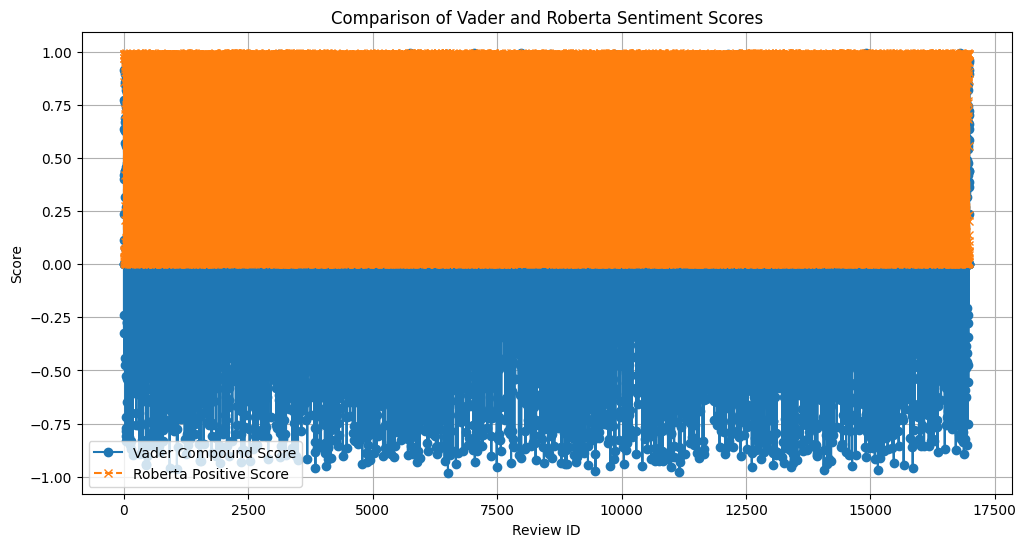

Correlation between Vader compound and Roberta positive scores: 0.7934958266047362


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the comparison
plt.figure(figsize=(12, 6))

plt.plot(results_df['Id'], results_df['compound'], label='Vader Compound Score', marker='o', linestyle='-')
plt.plot(results_df['Id'], results_df['roberta_pos'], label='Roberta Positive Score', marker='x', linestyle='--')


plt.xlabel('Review ID')
plt.ylabel('Score')
plt.title('Comparison of Vader and Roberta Sentiment Scores')
plt.legend()
plt.grid(True)
plt.show()


# Calculate the correlation between the scores
correlation = results_df['compound'].corr(results_df['roberta_pos'])
print(f"Correlation between Vader compound and Roberta positive scores: {correlation}")


In [ ]:
results_df.query('compound == 1').sort_values('roberta_pos', ascending=False).head(5)

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos


# **Test model with unique text**

In [ ]:
example = "this is a good example"

#Vader Results
print(example)
sia.polarity_scores(example)
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict

this is a good example


{'roberta_neg': 0.004974735,
 'roberta_neu': 0.060444158,
 'roberta_pos': 0.93458116}

# **Test model with positive text**

In [ ]:
example = "This is a unique and exceptional product, I highly recommend it!"
#Vader Results
print(example)
sia.polarity_scores(example)
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict

This is a unique and exceptional product, I highly recommend it!


{'roberta_neg': 0.0014396788,
 'roberta_neu': 0.009471188,
 'roberta_pos': 0.9890891}

# **Test model with negative text**

In [ ]:
example = "This product is absolutely terrible.  I would not recommend it to anyone."
#Vader Results
print(example)
sia.polarity_scores(example)
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict


This product is absolutely terrible.  I would not recommend it to anyone.


{'roberta_neg': 0.9800346,
 'roberta_neu': 0.016423056,
 'roberta_pos': 0.0035423618}

# **Test model with neutral text**

In [ ]:
example = "The product is neither good nor bad."
#Vader Results
print(example)
sia.polarity_scores(example)
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict


The product is neither good nor bad.


{'roberta_neg': 0.10463709,
 'roberta_neu': 0.54959303,
 'roberta_pos': 0.34576982}

# **Transformer-Based NLP for Sequential Data Analysis**
###**Objective:**
**This project applies Transformer-based models to analyze sequential text data, specifically customer reviews from an e-commerce platform (Daraz). The goal is to process, tokenize, and extract insights from textual data for potential applications such as sentiment analysis, classification, or recommendation systems.**

# **Key Steps:**

###**1. Data Preprocessing:**


**Loaded customer reviews dataset (daraz-product-reviews.csv).
Checked for missing values and performed initial exploratory data analysis (EDA).**

###**2. Text Tokenization & Processing:**

**Tokenized text using NLTK's word tokenizer.
Applied Part-of-Speech (POS) tagging to understand word categories.**

###**3. Chunking & Feature Extraction:**

**Processed text in chunks for efficient handling of large datasets.
Extracted important linguistic features using NLP techniques.**

###**4. Transformer Model Implementation:**
**Trained the model to learn patterns in customer feedback.**

###**5. Visualization & Analysis:**

**Used matplotlib and other tools for data visualization.
Evaluated model performance.**

###**6. Potential Applications:**
**Sentiment Analysis (Positive/Negative/Neutral reviews)**

**Customer Feedback Insights for Businesses**

**Automated Review Moderation**

**Chatbots and Personalized Recommendations**